# Import librairies

In [1]:
# To check PEP8 need installation : pip install flake8 pycodestyle pycodestyle_magic
# add %%flake8 in each block to check it
%load_ext pycodestyle_magic

In [2]:
# %%flake8

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_pca_correlation_graph
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from math import pi
from sklearn.manifold import TSNE
from statistics import mean
from dateutil.relativedelta import relativedelta

 # Load data files

In [3]:
data = pd.read_csv('data_final.csv')

# Overview of data

In [4]:
# %%flake8

# To optimize display of the Dataframe

# increase max rows displayed to 999
pd.set_option('display.max_rows', 999)

# increase max columns displayed to 999
pd.set_option('display.max_columns', 999)
# increase columns width to 100
pd.set_option('display.max_colwidth', 200)

# Formating float
pd.options.display.float_format = '{:.2f}'.format

In [5]:
# %%flake8

# define random_state
rd_state = 1

In [6]:
data.head()

customer_unique_id  Nb_of_order  Late_delivery_hours_mean  \
0  0000366f3b9a7992bf8c76cfdf3221e2            1                      0.00   
1  a950838df5be241bc39b897236a2500e            1                      0.00   
2  a94f2022aa8364748a84714fb76ea9f8            1                      0.00   
3  a94ee4590dfa55d48034194a05c491ac            1                      0.00   
4  a94dd925716ba578d23a771b20b90da0            1                      0.00   

   Nb_order_delivered_on_time  Nb_of_product_mean  \
0                           1                1.00   
1                           1                1.00   
2                           1                1.00   
3                           1                1.00   
4                           1                1.00   

   Nb_of_different_product_mean  Nb_of_product_categories_mean  \
0                          1.00                           1.00   
1                          1.00                           1.00   
2                          1.00                           1.00   
3                          1.00                           1.00   
4                          1.00                           1.00   

   Nb_payment_type_mean  Average_basket_value  Average_score  \
0                  1.00                141.90           5.00   
1                  1.00                310.21           5.00   
2                  1.00                138.62           5.00   
3                  1.00                150.14           5.00   
4                  1.00                123.79           4.00   

   Nb_of_caracters_in_comment_mean  review_time_mean  order_weight_g_mean  \
0                           111.00              4.00              1500.00   
1                             0.00              1.00              5650.00   
2                             0.00              4.00               488.00   
3                             5.00              8.00              1600.00   
4                             0.00             11.00              7500.00   

   order_volume_cm3_mean  Nb_of_days_since_last_order  \
0                7616.00                          160   
1              106580.00                          310   
2                4590.00                          219   
3               15750.00                          316   
4               30866.00                           95   

   Rate_of_orders_delivered_on_time  
0                            100.00  
1                            100.00  
2                            100.00  
3                            100.00  
4                            100.00

In [7]:
data.describe()

Nb_of_order  Late_delivery_hours_mean  Nb_order_delivered_on_time  \
count     93762.00                  93762.00                    93762.00   
mean          1.03                    185.45                        0.93   
std           0.21                   1243.75                        0.37   
min           1.00                      0.00                        0.00   
25%           1.00                      0.00                        1.00   
50%           1.00                      0.00                        1.00   
75%           1.00                      0.00                        1.00   
max          16.00                  17465.51                       15.00   

       Nb_of_product_mean  Nb_of_different_product_mean  \
count            93762.00                      93762.00   
mean                 1.14                          1.04   
std                  0.51                          0.21   
min                  1.00                          1.00   
25%                  1.00                          1.00   
50%                  1.00                          1.00   
75%                  1.00                          1.00   
max                 21.00                          8.00   

       Nb_of_product_categories_mean  Nb_payment_type_mean  \
count                       93762.00              93762.00   
mean                            0.99                  1.04   
std                             0.14                  0.37   
min                             0.00                  1.00   
25%                             1.00                  1.00   
50%                             1.00                  1.00   
75%                             1.00                  1.00   
max                             3.00                 29.00   

       Average_basket_value  Average_score  Nb_of_caracters_in_comment_mean  \
count              93762.00       93762.00                         93762.00   
mean                 161.06           4.09                            29.00   
std                  221.56           1.34                            49.00   
min                    9.59           1.00                             0.00   
25%                   62.41           4.00                             0.00   
50%                  105.73           5.00                             0.00   
75%                  177.02           5.00                            43.00   
max                13664.08           5.00                           208.00   

       review_time_mean  order_weight_g_mean  order_volume_cm3_mean  \
count          93762.00             93762.00               93762.00   
mean               2.58              2391.52               17392.08   
std                9.76              4732.62               30171.58   
min                0.00                 0.00                   0.00   
25%                1.00               300.00                2992.00   
50%                1.00               750.00                7429.00   
75%                3.00              2100.00               19872.00   
max              518.00            184400.00             1476000.00   

       Nb_of_days_since_last_order  Rate_of_orders_delivered_on_time  
count                     93762.00                          93762.00  
mean                        288.89                             89.70  
std                         152.92                             30.22  
min                          44.00                              0.00  
25%                         165.00                            100.00  
50%                         270.00                            100.00  
75%                         398.00                            100.00  
max                         772.00                            100.00

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93762 entries, 0 to 93761
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   customer_unique_id                93762 non-null  object 
 1   Nb_of_order                       93762 non-null  int64  
 2   Late_delivery_hours_mean          93762 non-null  float64
 3   Nb_order_delivered_on_time        93762 non-null  int64  
 4   Nb_of_product_mean                93762 non-null  float64
 5   Nb_of_different_product_mean      93762 non-null  float64
 6   Nb_of_product_categories_mean     93762 non-null  float64
 7   Nb_payment_type_mean              93762 non-null  float64
 8   Average_basket_value              93762 non-null  float64
 9   Average_score                     93762 non-null  float64
 10  Nb_of_caracters_in_comment_mean   93762 non-null  float64
 11  review_time_mean                  93762 non-null  float64
 12  orde

In [9]:
data.columns

Index(['customer_unique_id', 'Nb_of_order', 'Late_delivery_hours_mean',
       'Nb_order_delivered_on_time', 'Nb_of_product_mean',
       'Nb_of_different_product_mean', 'Nb_of_product_categories_mean',
       'Nb_payment_type_mean', 'Average_basket_value', 'Average_score',
       'Nb_of_caracters_in_comment_mean', 'review_time_mean',
       'order_weight_g_mean', 'order_volume_cm3_mean',
       'Nb_of_days_since_last_order', 'Rate_of_orders_delivered_on_time'],
      dtype='object')

# PCA

In [10]:
data_copy = data.copy()

In [11]:
# %%flake8

data_copy = data_copy.drop(['customer_unique_id'], axis=1)

In [12]:
# %%flake8

def calculate_pca(df):
    
    # check there's no NaN value
    if df.isna().sum().sum() > 0:
        print('Error There\'s some features with NaN values')
    else:
        X = df.values
        
        # create the object
        scaler = StandardScaler()
        
        # Calculate the mean and standard deviation for each variable in the dataset
        scaler.fit(X)
        
        # tranform the values
        X_scaled = scaler.transform(X)
        
        # apply PCA for the dataset

        pca = PCA(n_components=None, random_state=rd_state)
        pca.fit(X_scaled)
        X_pca = pca.transform(X_scaled)
        
        return X_scaled, pca, X_pca

In [13]:
# use function calculate_pca
X_scaled, pca, X_pca = calculate_pca(data_copy)

In [14]:
# %%flake8

# values of the percentage of variance
# explained by each of the selected components
pca.explained_variance_ratio_*100

array([17.38607866, 15.12514239,  9.49083323,  8.05247494,  7.11206044,
        6.65110735,  6.60833425,  6.46252938,  6.00123859,  4.92655201,
        4.18752008,  3.46501976,  3.33558072,  1.15134859,  0.04417962])

The first component alone captures about 17% of the variability in the dataset and the second component alone captures about 15% of the variability in the dataset , etc..

In [15]:
# %%flake8

# Total variance explained by each of the selected components.
np.cumsum(pca.explained_variance_ratio_*100)

array([ 17.38607866,  32.51122105,  42.00205428,  50.05452922,
        57.16658966,  63.81769701,  70.42603126,  76.88856064,
        82.88979922,  87.81635124,  92.00387131,  95.46889107,
        98.80447179,  99.95582038, 100.        ])

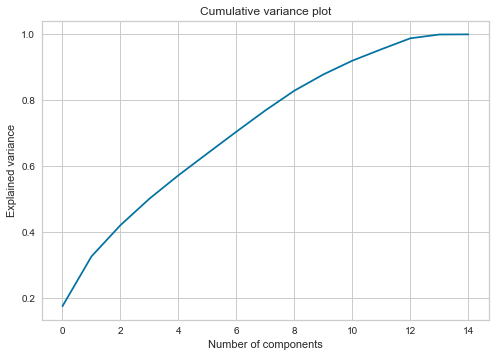

In [16]:
# %%flake8

# Plot of the total variance explained by each of the selected components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.title('Cumulative variance plot')

# to save graph
plt.savefig('Cumulative variance plot.png')

plt.show()

In [17]:
# %%flake8

# display cumlative variance until 90% and save the nb of component
nb_component = 1
while np.cumsum(pca.explained_variance_ratio_ * 100)[nb_component-1] < 90:
    print('Variance explained by ', nb_component, 'principal component =',
          np.cumsum(pca.explained_variance_ratio_ * 100)[nb_component-1])
    nb_component += 1
print('Variance explained by ', nb_component, 'principal component =',
      np.cumsum(pca.explained_variance_ratio_ * 100)[nb_component-1])

Variance explained by  1 principal component = 17.386078660163655
Variance explained by  2 principal component = 32.51122105376607
Variance explained by  3 principal component = 42.002054279012256
Variance explained by  4 principal component = 50.054529219586065
Variance explained by  5 principal component = 57.16658965913478
Variance explained by  6 principal component = 63.81769700986713
Variance explained by  7 principal component = 70.42603125931566
Variance explained by  8 principal component = 76.88856063783072
Variance explained by  9 principal component = 82.88979922422169
Variance explained by  10 principal component = 87.81635123787115
Variance explained by  11 principal component = 92.00387131348572


We can see that the first 11 principal components keep about 92% of the variability in the dataset

Functions to display factorial plane and correlation circle :

In [18]:
# %%flake8

""" create function du display the factorial planes of PCA"""


def display_factorial_planes(dim1, dim2, datas_to_hue=None):
    dim1_variance_explained = pca.explained_variance_ratio_[dim1-1]*100
    dim2_variance_explained = pca.explained_variance_ratio_[dim2-1]*100
    plt.figure(figsize=(10, 7))

    if datas_to_hue is None:
        sns.scatterplot(x=X_pca[:, dim1-1],
                        y=X_pca[:, dim2-1], s=70, palette="tab10")
    else:
        sns.scatterplot(x=X_pca[:, dim1-1], y=X_pca[:, dim2-1],
                        s=70, hue=datas_to_hue,
                        hue_order=sorted(datas_to_hue.value_counts().index),
                        palette="tab10")
    plt.title('2D scatterplot: {:.2f}% of the variability captured'.format(
        dim1_variance_explained+dim2_variance_explained), pad=15)
    plt.xlabel('Dim {} ({:.2f}%)'.format(dim1, dim1_variance_explained))
    plt.ylabel('Dim {} ({:.2f}%)'.format(dim2, dim2_variance_explained))
    plt.show()

In [19]:
# %%flake8

""" create a function to display the correlation circle of PCA """


def display_correlation_circle(dim1, dim2):
    figure, correlation_matrix = \
        plot_pca_correlation_graph(X_scaled, data_copy.columns,
                                   X_pca=X_pca[:, :dim2],
                                   explained_variance=pca.
                                   explained_variance_[:dim2],
                                   dimensions=(dim1, dim2),
                                   figure_axis_size=12)

Analysis of component 1 and 2 :

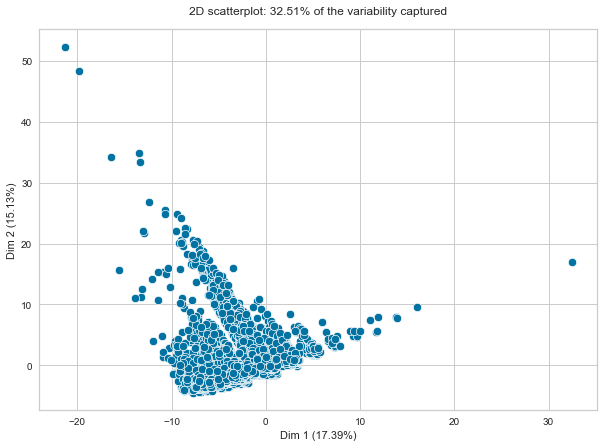

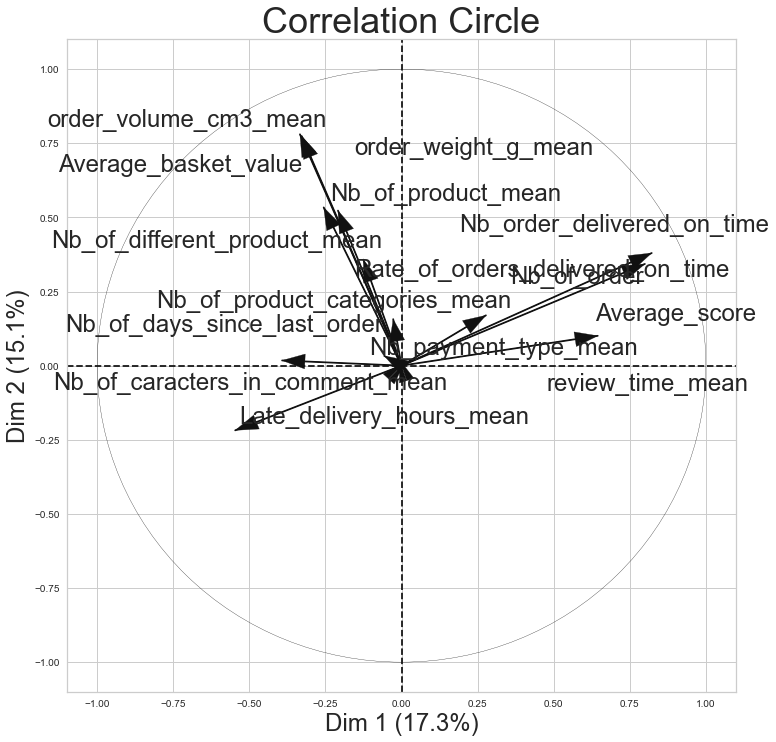

In [20]:
# %%flake8

display_factorial_planes(1, 2)
display_correlation_circle(1, 2)

We can see that Late_delivery_hours_mean is negatively correlated with average_score
The fisrt dimension seems represent the customer satisfaction

In [21]:
# %%flake8

# keep 11 components that represent more than 90% of the variability in the dataset
data_pca = X_pca[:, :nb_component]
data_pca.shape

(93762, 11)

# Clustering

## KMeans

### Search the best number of clusters

In [22]:
# %%flake8

# create a copy of datas from PCA
data_clustering = data_pca.copy()

In [23]:
# %%flake8

# Search with Kmeans the best number of cluster

# create a dataframe to store results
kmeans_result = pd.DataFrame(columns=[
                             'Nb_of_cluster', 'silhouette_score',
                             'Inertia', 'Davies_Bouldin_score', 'model'])

for i in range(3, 11):
    kmeans_model = KMeans(
        n_clusters=i, random_state=rd_state).fit(data_clustering)
    
    # the labels 
    labels = kmeans_model.labels_
    
    # calculate Silhouette score
    score_silhouette = silhouette_score(
        data_clustering, labels, metric='euclidean')
    
    # save inertia
    inertia = kmeans_model.inertia_
    
    # calculate Davies Bouldin score
    score_davies_bouldin = davies_bouldin_score(data_clustering, labels)
    
    # store results in the dataframe
    kmeans_result = kmeans_result.append(
        {'Nb_of_cluster': i, 'silhouette_score': score_silhouette,
         'Inertia': inertia, 'Davies_Bouldin_score': score_davies_bouldin,
         'model': kmeans_model}, ignore_index=True)

In [24]:
# df of the results for each nb of cluster
kmeans_result

Nb_of_cluster  silhouette_score   Inertia  Davies_Bouldin_score  \
0             3              0.48 981213.05                  1.59   
1             4              0.50 889959.42                  1.44   
2             5              0.50 811323.92                  1.14   
3             6              0.24 756868.10                  1.37   
4             7              0.49 692293.95                  1.00   
5             8              0.25 638203.28                  1.17   
6             9              0.27 587250.31                  1.10   
7            10              0.28 528795.32                  1.02   

                                   model  
0   KMeans(n_clusters=3, random_state=1)  
1   KMeans(n_clusters=4, random_state=1)  
2   KMeans(n_clusters=5, random_state=1)  
3   KMeans(n_clusters=6, random_state=1)  
4   KMeans(n_clusters=7, random_state=1)  
5                 KMeans(random_state=1)  
6   KMeans(n_clusters=9, random_state=1)  
7  KMeans(n_clusters=10, random_state=1)

In [25]:
# %%flake8

""" create function to draw graph of datas """


def graph_score(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(10, 5))
    sns.lineplot(x=x,
                 y=y, alpha=0.9, marker="o")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # to save graph
    plt.savefig(title + '.png')
    
    plt.show()

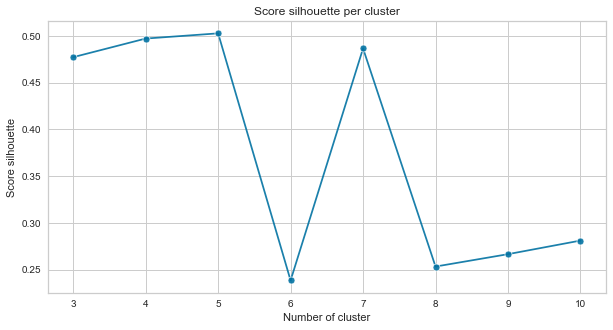

In [26]:
# %%flake8

# use function graph_score for the Silhouette score
graph_score(kmeans_result['Nb_of_cluster'], kmeans_result['silhouette_score'],
            'Number of cluster', 'Score silhouette',
            'Score silhouette per cluster')

In [27]:
# %%flake8

# display best score for Silhouette Coefficient
cluster_best_silhouette_score = int(
    kmeans_result.loc[kmeans_result['silhouette_score'] == kmeans_result[
        'silhouette_score'].max()]['Nb_of_cluster'].values[0])
print('Best Silhouette score (max) : {:0.2f}'.format(
    kmeans_result['silhouette_score'].max()))
print('For {}'.format(cluster_best_silhouette_score), 'cluster')

Best Silhouette score (max) : 0.50
For 5 cluster


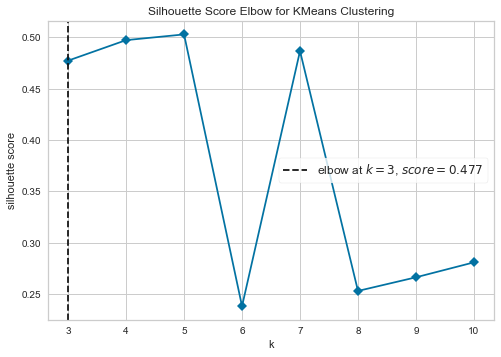

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [28]:
# %%flake8

# Display graph of Silhouette score with yellowbrick

# Instantiate the clustering model and visualizer
model = KMeans(random_state=rd_state)
visualizer = KElbowVisualizer(
    model, k=(3, 11), metric='silhouette', timings=False)

visualizer.fit(data_clustering)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

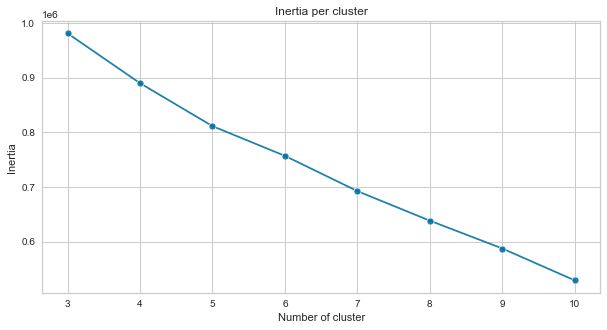

In [29]:
# %%flake8

# use function graph_score for the Inertia
graph_score(kmeans_result['Nb_of_cluster'], kmeans_result['Inertia'],
            'Number of cluster', 'Inertia', 'Inertia per cluster')

In [30]:
# %%flake8

# display best Inertia
cluster_best_inertia = int(
    kmeans_result.loc[kmeans_result['Inertia'] == kmeans_result[
        'Inertia'].max()]['Nb_of_cluster'].values[0])
print('Best Inertia (max) : {:0.2f}'.format(kmeans_result['Inertia'].max()))
print('For {}'.format(cluster_best_inertia), 'cluster')

Best Inertia (max) : 981213.05
For 3 cluster


C:\Users\Hugues\anaconda3\lib\site-packages\yellowbrick\utils\kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
C:\Users\Hugues\anaconda3\lib\site-packages\yellowbrick\cluster\elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


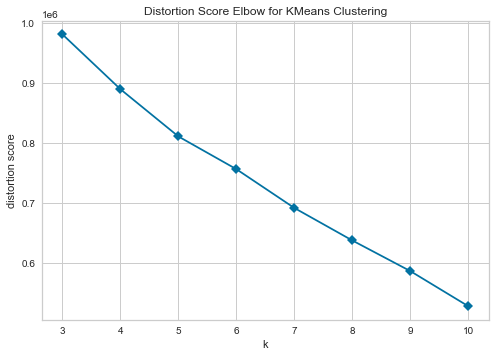

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
# %%flake8

# Display graph of Inertia with yellowbrick

# Instantiate the clustering model and visualizer
model = KMeans(random_state=rd_state)
visualizer = KElbowVisualizer(model, k=(3, 11), timings=False)

visualizer.fit(data_clustering)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

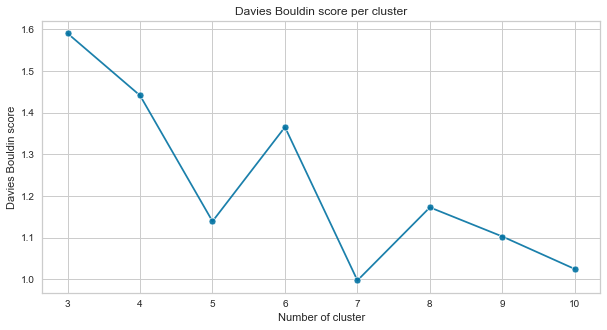

In [32]:
# %%flake8

# use function graph_score for the Davies Bouldin score
graph_score(kmeans_result['Nb_of_cluster'],
            kmeans_result['Davies_Bouldin_score'],
            'Number of cluster', 'Davies Bouldin score',
            'Davies Bouldin score per cluster')

In [33]:
# %%flake8

# display best score for Davies Bouldin index
cluster_best_davies_douldin_score = int(
    kmeans_result.loc[kmeans_result['Davies_Bouldin_score'] == kmeans_result[
        'Davies_Bouldin_score'].min()]['Nb_of_cluster'].values[0])
print('Best Davies Bouldin score (min) : {:0.2f}'.format(
    kmeans_result['Davies_Bouldin_score'].min()))
print('For {}'.format(cluster_best_davies_douldin_score), 'cluster')

Best Davies Bouldin score (min) : 1.00
For 7 cluster


The best result is with 5 clusters with Silhouette Coefficient.
I'll study the results with 4, 5, 6 and 7 clusters

In [34]:
# %%flake8

# create a list of the clusters to test
clusters_test = [cluster_best_silhouette_score-1,
                      cluster_best_silhouette_score,
                      cluster_best_silhouette_score+1,
                      cluster_best_silhouette_score+2]

### Silhouette Visualizer

In [35]:
# %%flake8

""" create a function to use yellowbrick to display
 clusters with SilhouetteVisualizer """


def cluster_silhouettesisualizer(nb_clusters, random_state=rd_state):
    # Use yellowbrick to display clusters
    model = KMeans(nb_clusters, random_state=random_state)

    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

    visualizer.fit(data_clustering)    # Fit the data to the visualizer
    visualizer.poof()    # Draw/show/poof the data

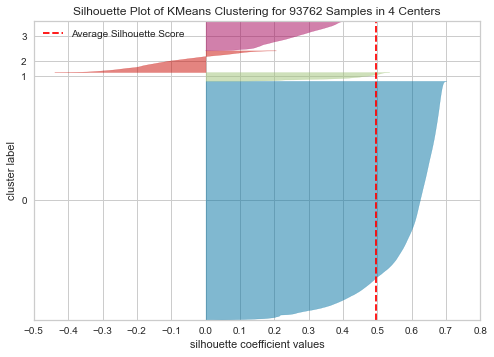

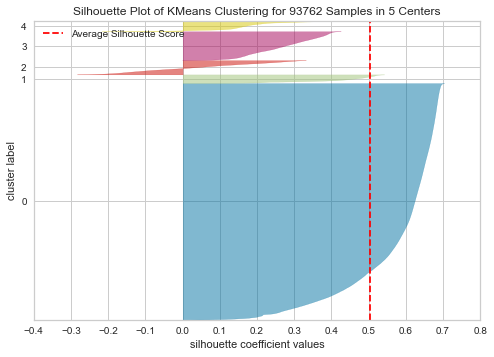

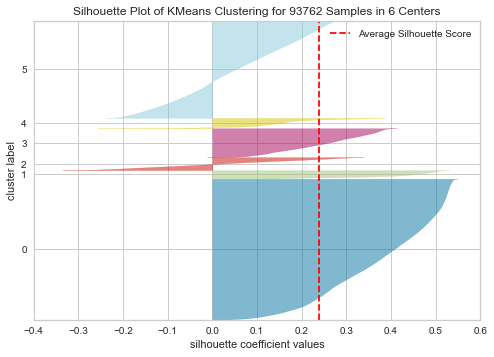

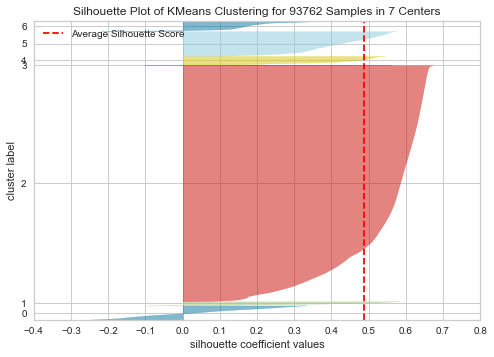

In [36]:
# %%flake8

# use function cluster_silhouettesisualizer for each clusters to test
for i in clusters_test:
    cluster_silhouettesisualizer(i)

Silhouette Visualizer gives a view of the density and the separation between clusters:
- 4 clusters : cluster 0 is a big one, clusters 0 and 1 are greater than the mean Silhouette score, cluster 2 has a silhouette negative value that indicate there's a big part of customers assigned to the wrong cluster
- 5 clusters : cluster 0 is a big one, clusters 0 and 1 are greater than the mean Silhouette score, cluster 2 has a silhouette negative value that indicate there's a part of customers assigned to the wrong cluster
- 6 clusters : the mean Silhouette score is lower than the others clustering, cluster  0 is a big one but lees than the others clustering, all clusters have a greater value than the mean of Silhouette score, 3 clusters have a silhouette negative value that indicate there's a part of customers assigned to the wrong cluster
- 7 clusters : cluster 2 is a big one, 4 clusters have a greater value than the mean of Silhouette score, cluster 0 has a significant negative value that indicate there's a part of customers assigned to the wrong cluster

### Analyze of clusters

In [37]:
# %%flake8

# create a dataframe from X_scaled (values normalized)
df_normalized = pd.DataFrame(X_scaled)

In [38]:
# %%flake8

# add label of columns
df_normalized.columns = data_copy.columns
df_normalized

Nb_of_order  Late_delivery_hours_mean  Nb_order_delivered_on_time  \
0            -0.16                     -0.15                        0.20   
1            -0.16                     -0.15                        0.20   
2            -0.16                     -0.15                        0.20   
3            -0.16                     -0.15                        0.20   
4            -0.16                     -0.15                        0.20   
...            ...                       ...                         ...   
93757        28.42                     -0.14                       13.88   
93758        28.42                     -0.15                       16.61   
93759        28.42                     -0.15                       16.61   
93760        37.94                     -0.15                       19.35   
93761        71.28                      0.47                       38.50   

       Nb_of_product_mean  Nb_of_different_product_mean  \
0                   -0.26                         -0.17   
1                   -0.26                         -0.17   
2                   -0.26                         -0.17   
3                   -0.26                         -0.17   
4                   -0.26                         -0.17   
...                   ...                           ...   
93757                1.12                          1.16   
93758                0.29                          1.16   
93759                0.29                          0.50   
93760                0.82                          1.90   
93761               -0.26                         -0.17   

       Nb_of_product_categories_mean  Nb_payment_type_mean  \
0                               0.07                 -0.12   
1                               0.07                 -0.12   
2                               0.07                 -0.12   
3                               0.07                 -0.12   
4                               0.07                 -0.12   
...                              ...                   ...   
93757                           0.07                 -0.12   
93758                           0.07                  0.26   
93759                           0.07                 -0.12   
93760                           0.86                 -0.12   
93761                          -0.38                 -0.12   

       Average_basket_value  Average_score  Nb_of_caracters_in_comment_mean  \
0                     -0.09           0.68                             1.67   
1                      0.67           0.68                            -0.59   
2                     -0.10           0.68                            -0.59   
3                     -0.05           0.68                            -0.49   
4                     -0.17          -0.06                            -0.59   
...                     ...            ...                              ...   
93757                 -0.00           0.68                            -0.59   
93758                 -0.11           0.68                            -0.59   
93759                 -0.24           0.68                            -0.59   
93760                 -0.14          -0.98                            -0.59   
93761                 -0.47           0.68                            -0.59   

       review_time_mean  order_weight_g_mean  order_volume_cm3_mean  \
0                  0.15                -0.19                  -0.32   
1                 -0.16                 0.69                   2.96   
2                  0.15                -0.40                  -0.42   
3                  0.56                -0.17                  -0.05   
4                  0.86                 1.08                   0.45   
...                 ...                  ...                    ...   
93757             -0.19                 0.64                   0.41   
93758             -0.13                -0.05                   0.07   
93759             -0.22                 0.27        

In [39]:
# %%flake8

""" create a function to assign the label of cluster to the customer"""


def assign_cluster(df_customers, nb_of_cluster):

    # create a dataframe with clusters assigned to each samples

    # select cluster_label with nb_of_cluster from dataframe kmeans_result
    clusters_label = kmeans_result[
        kmeans_result[
            'Nb_of_cluster'] == nb_of_cluster]['model'].values[0].labels_
    
    # dataframe of the label for each customers
    df_clusters = pd.DataFrame(clusters_label,
                               columns=[str(nb_of_cluster) + '_clusters'])

    # join df_customers with df_clusters
    df_customers = df_customers.join(df_clusters)

    return df_customers

In [40]:
# %%flake8

# use function assign_cluster for each clusters to test
data_clustered = df_normalized.copy()

for i in clusters_test:
    data_clustered = assign_cluster(data_clustered, i)
data_clustered

Nb_of_order  Late_delivery_hours_mean  Nb_order_delivered_on_time  \
0            -0.16                     -0.15                        0.20   
1            -0.16                     -0.15                        0.20   
2            -0.16                     -0.15                        0.20   
3            -0.16                     -0.15                        0.20   
4            -0.16                     -0.15                        0.20   
...            ...                       ...                         ...   
93757        28.42                     -0.14                       13.88   
93758        28.42                     -0.15                       16.61   
93759        28.42                     -0.15                       16.61   
93760        37.94                     -0.15                       19.35   
93761        71.28                      0.47                       38.50   

       Nb_of_product_mean  Nb_of_different_product_mean  \
0                   -0.26                         -0.17   
1                   -0.26                         -0.17   
2                   -0.26                         -0.17   
3                   -0.26                         -0.17   
4                   -0.26                         -0.17   
...                   ...                           ...   
93757                1.12                          1.16   
93758                0.29                          1.16   
93759                0.29                          0.50   
93760                0.82                          1.90   
93761               -0.26                         -0.17   

       Nb_of_product_categories_mean  Nb_payment_type_mean  \
0                               0.07                 -0.12   
1                               0.07                 -0.12   
2                               0.07                 -0.12   
3                               0.07                 -0.12   
4                               0.07                 -0.12   
...                              ...                   ...   
93757                           0.07                 -0.12   
93758                           0.07                  0.26   
93759                           0.07                 -0.12   
93760                           0.86                 -0.12   
93761                          -0.38                 -0.12   

       Average_basket_value  Average_score  Nb_of_caracters_in_comment_mean  \
0                     -0.09           0.68                             1.67   
1                      0.67           0.68                            -0.59   
2                     -0.10           0.68                            -0.59   
3                     -0.05           0.68                            -0.49   
4                     -0.17          -0.06                            -0.59   
...                     ...            ...                              ...   
93757                 -0.00           0.68                            -0.59   
93758                 -0.11           0.68                            -0.59   
93759                 -0.24           0.68                            -0.59   
93760                 -0.14          -0.98                            -0.59   
93761                 -0.47           0.68                            -0.59   

       review_time_mean  order_weight_g_mean  order_volume_cm3_mean  \
0                  0.15                -0.19                  -0.32   
1                 -0.16                 0.69                   2.96   
2                  0.15                -0.40                  -0.42   
3                  0.56                -0.17                  -0.05   
4                  0.86                 1.08                   0.45   
...                 ...                  ...                    ...   
93757             -0.19                 0.64                   0.41   
93758             -0.13                -0.05                   0.07   
93759             -0.22                 0.27        

In [41]:
# %%flake8

""" create a function to display a bar plot of a column from a dataframe """


def bar_df_column(df, column, xlabel, ylabel, title, order=True, rotation=0):
    plt.figure(figsize=(7, 5))
    if order:
        sns.countplot(x=column, data=df,
                      order=df[column].value_counts().iloc[:].index)
    else:
        sns.countplot(x=column, data=df)
    plt.xticks(rotation=rotation)

    # to display % for each bar
    for index, value in enumerate(df[column].value_counts()):
        plt.text(index, value, str(format(value/df[column].value_counts().sum()*100, '.2f'))+'%',horizontalalignment='center')
        
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    # to save graph
    plt.savefig(title + '.png')

    plt.show()

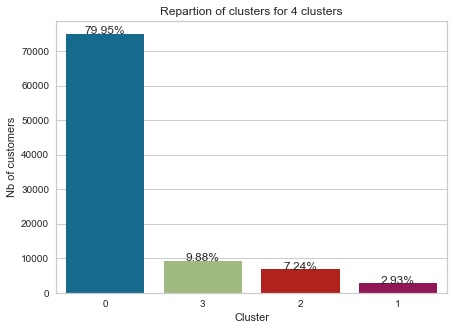

Number of customers per cluster :
0    74963
3     9260
2     6792
1     2747
Name: 4_clusters, dtype: int64


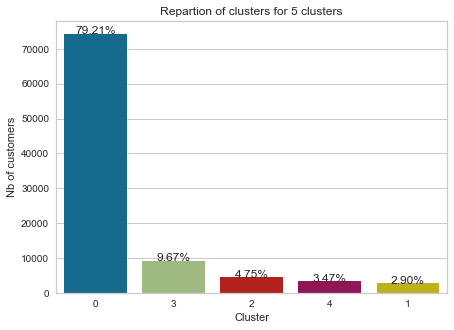

Number of customers per cluster :
0    74268
3     9063
2     4452
4     3258
1     2721
Name: 5_clusters, dtype: int64


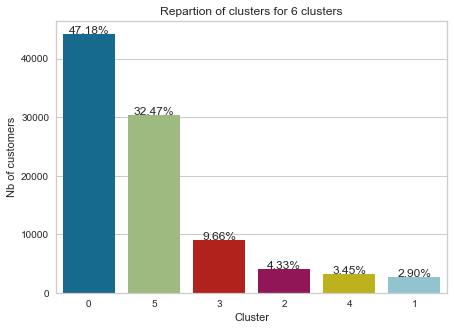

Number of customers per cluster :
0    44239
5    30447
3     9062
2     4062
4     3231
1     2721
Name: 6_clusters, dtype: int64


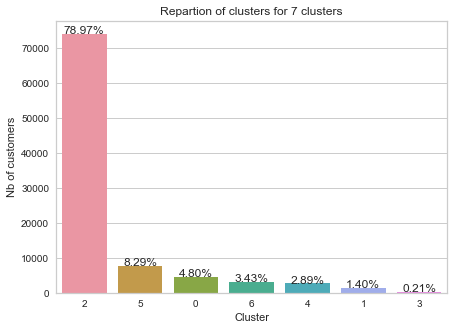

Number of customers per cluster :
2    74045
5     7775
0     4500
6     3220
4     2709
1     1313
3      200
Name: 7_clusters, dtype: int64


In [42]:
# %%flake8


# use function pie_df_column to display the repartition
# of cluster per nb of cluster
for i in clusters_test:
    bar_df_column(
        data_clustered, str(i) + '_clusters', 'Cluster',
        'Nb of customers',
        'Repartion of clusters for ' + str(i) + ' clusters')
    # Number of customer per cluster
    print('Number of customers per cluster :')
    print(data_clustered[str(i) + '_clusters'].value_counts())

***

For a better visualization I'll explore each clustering selected (clusters_test) one by one

**Representation for 4 Clusters**

In [43]:
# %%flake8

""" create a function to group datas on a column and
    calculate mean for each features """


def group_datas(df, column):
    df_grouped = df.groupby(column, as_index=False).mean()
    return df_grouped

In [44]:
# %%flake8

# use function group_datas to group clusters label
# and calculate the mean of features

# datas of other clusters to remove
drop_column = len(clusters_test)-1

# group datas for 4 clusters
data_4_clusters_aggregated = group_datas(
    data_clustered, str(clusters_test[0]) + '_clusters').iloc[:, :-drop_column]

data_4_clusters_aggregated

4_clusters  Nb_of_order  Late_delivery_hours_mean  \
0           0        -0.16                     -0.15   
1           1         5.16                     -0.02   
2           2        -0.14                     -0.12   
3           3        -0.13                      1.30   

   Nb_order_delivered_on_time  Nb_of_product_mean  \
0                        0.20               -0.16   
1                        2.83                0.09   
2                        0.13                1.91   
3                       -2.54               -0.10   

   Nb_of_different_product_mean  Nb_of_product_categories_mean  \
0                         -0.17                          -0.04   
1                          0.12                           0.05   
2                          1.91                           0.51   
3                         -0.10                          -0.06   

   Nb_payment_type_mean  Average_basket_value  Average_score  \
0                 -0.00                 -0.12           0.19   
1                  0.04                 -0.09           0.08   
2                  0.05                  1.36          -0.37   
3                 -0.01                  0.02          -1.29   

   Nb_of_caracters_in_comment_mean  review_time_mean  order_weight_g_mean  \
0                            -0.09              0.00                -0.16   
1                            -0.05             -0.02                -0.05   
2                             0.37              0.00                 1.79   
3                             0.46             -0.03                -0.03   

   order_volume_cm3_mean  Nb_of_days_since_last_order  \
0                  -0.16                         0.01   
1                  -0.03                        -0.11   
2                   1.80                         0.08   
3                  -0.04                        -0.07   

   Rate_of_orders_delivered_on_time  
0                              0.34  
1                              0.10  
2                              0.24  
3                             -2.97

In [45]:
# %%flake8

""" create a function to normalize datas with MinMaxScaler """


def normalize_df(df):
    scaler = MinMaxScaler(feature_range=(0, 100))
    scaled_features = scaler.fit_transform(df)
    df = pd.DataFrame(scaled_features)
    return df

In [46]:
# %%flake8

# use function normalize_df to normalize with
# MinMaxScaler to have same scale (0,100) for each features
data_4_clusters_agg_norm = normalize_df(data_4_clusters_aggregated.iloc[:, 1:])

# reassign the name of columns
data_4_clusters_agg_norm.columns = data_4_clusters_aggregated.iloc[
    :, 1:].columns
data_4_clusters_agg_norm

Nb_of_order  Late_delivery_hours_mean  Nb_order_delivered_on_time  \
0         0.00                      0.00                       50.94   
1       100.00                      8.65                      100.00   
2         0.34                      1.85                       49.59   
3         0.61                    100.00                        0.00   

   Nb_of_product_mean  Nb_of_different_product_mean  \
0                0.00                          0.00   
1               12.42                         13.72   
2              100.00                        100.00   
3                2.92                          3.06   

   Nb_of_product_categories_mean  Nb_payment_type_mean  Average_basket_value  \
0                           3.03                  6.39                  0.00   
1                          19.31                 93.05                  1.97   
2                         100.00                100.00                100.00   
3                           0.00                  0.00                  9.35   

   Average_score  Nb_of_caracters_in_comment_mean  review_time_mean  \
0         100.00                             0.00            100.00   
1          92.49                             7.70             24.14   
2          62.42                            82.99             98.07   
3           0.00                           100.00              0.00   

   order_weight_g_mean  order_volume_cm3_mean  Nb_of_days_since_last_order  \
0                 0.00                   0.00                        60.91   
1                 5.55                   6.29                         0.00   
2               100.00                 100.00                       100.00   
3                 6.49                   6.19                        23.06   

   Rate_of_orders_delivered_on_time  
0                            100.00  
1                             92.81  
2                             97.02  
3                              0.00

In [47]:
# %%flake8

""" create a function to draw a Radar chart """


def radar_chart(df, row_index):

    # number of variable
    variables = list(df)
    nb_varaibles = len(variables)

    # collect the data of the cluster in the data frame.
    # Need to repeat the first value to close the circular graph:
    values = df.loc[row_index].values.flatten().tolist()
    values += values[:1]
    values

    # Calculate the angle of each axis in the plot
    # (divide the plot / number of variable)
    angles = [n / float(nb_varaibles) * 2 * pi for n in range(nb_varaibles)]
    angles += angles[:1]

    plt.figure(figsize=(10, 10))
    # Initialise the spider plot
    ax = plt.subplot(111, polar=True)

    # Draw one axe per variable + add labels
    plt.xticks(angles[:-1], variables, color='grey', size=10)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([20, 40, 60, 80, 100],
               ["20", "40", "60", "80", "100"], color="grey", size=7)
    plt.ylim(0, 100)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid')

    # Fill area
    ax.fill(angles, values, 'b', alpha=0.1)

    # Add title
    ax.set_title('Profil of cluster {}'.format(row_index), y=1.05)

    # to save graph
    plt.savefig('Profil of cluster {}'.format(row_index) + '.png')
    
    # Show the graph
    plt.show()

Radar chart for 4 clusters


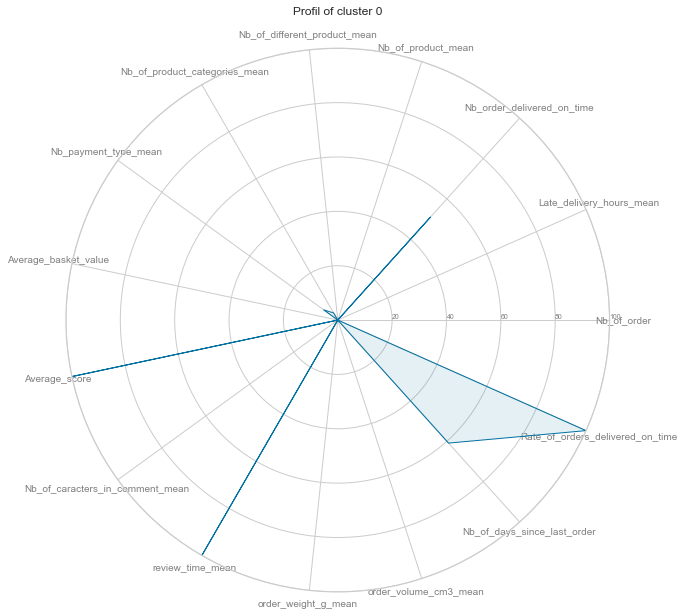

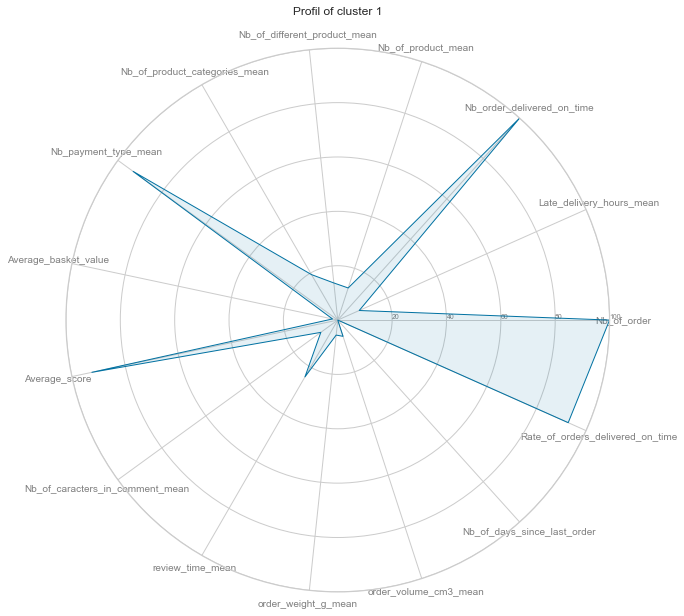

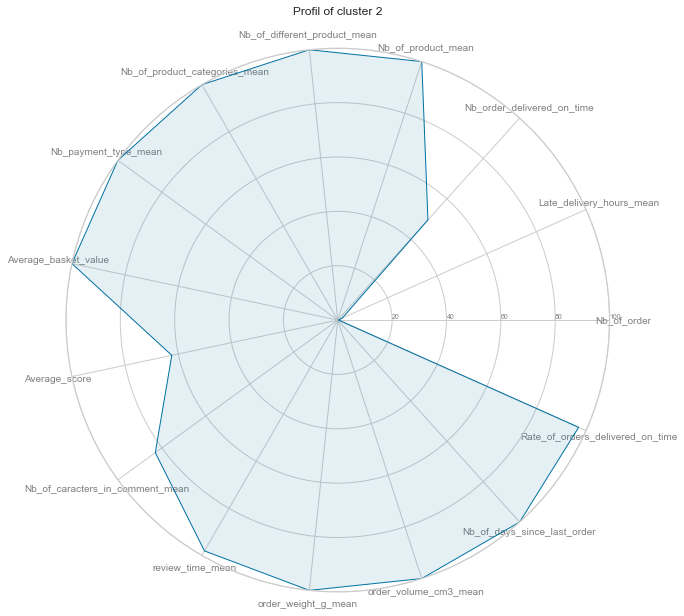

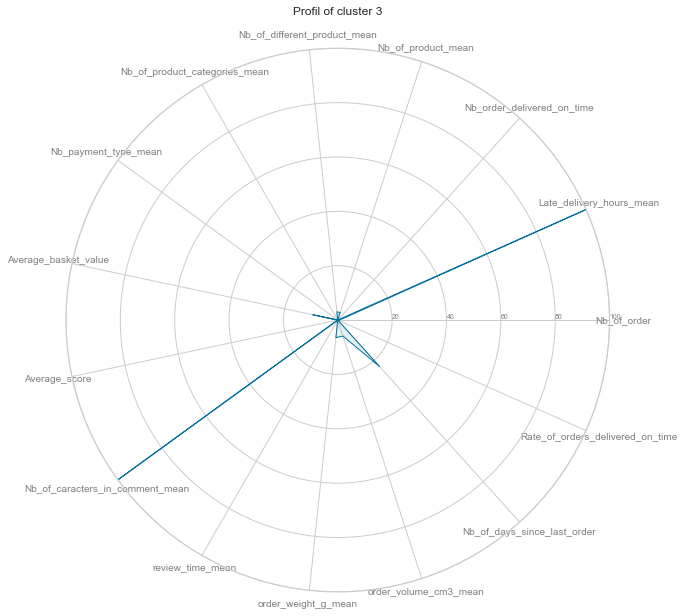

In [48]:
# %%flake8

# use function radar_chart to display a view for each cluster label
print('Radar chart for', data_4_clusters_agg_norm.shape[0], 'clusters')
for i in data_4_clusters_agg_norm.index:
    radar_chart(data_4_clusters_agg_norm, i)

**Cluster 0 : Small customer satisfy who sleep**
- very low basket value
- 1 payment type
- order 1 product
- order delivered on time
- ordered 1 time
- hasn't ordered for some time
- order very small articles
- no review comment
- very good review score

**Cluster 1 : Small regular customer satisfied**
- very low basket value
- use lot of payment type
- order a few product
- order delivered on time
- order a lot
- ordered recently
- order small articles
- no review comment
- very good review score

**Cluster 2 : Big customer moderately satisfied, lost**
- very big basket value
- use lot of payment type
- order different products
- order delivered on time
- ordered 1 time
- ordered a long time ago
- order big articles
- lot of review comment
- average review score

**cluster 3 : New small customer unsatisfied**
- low basket value
- 1 payment type
- order 1 product
- not delivered on time
- ordered 1 time
- ordered recently
- order small articles
- lot of review comment
- very low review score

***

**Representation for 5 Clusters**

In [49]:
# %%flake8

# use function group_datas to group clusters label
# and calculate the mean of features

# datas of other clusters to remove
drop_column = len(clusters_test)-1

# group datas for 5 clusters
data_5_clusters_aggregated = group_datas(
    data_clustered, str(clusters_test[1]) + '_clusters').iloc[:, :-drop_column]

data_5_clusters_aggregated

5_clusters  Nb_of_order  Late_delivery_hours_mean  \
0           0        -0.16                     -0.15   
1           1         5.16                     -0.03   
2           2        -0.14                     -0.10   
3           3        -0.13                      1.32   
4           4        -0.11                     -0.12   

   Nb_order_delivered_on_time  Nb_of_product_mean  \
0                        0.20               -0.15   
1                        2.84                0.07   
2                        0.06                0.41   
3                       -2.54               -0.12   
4                        0.08                3.11   

   Nb_of_different_product_mean  Nb_of_product_categories_mean  \
0                         -0.17                          -0.04   
1                          0.09                           0.04   
2                         -0.08                          -0.01   
3                         -0.15                          -0.06   
4                          4.23                           1.07   

   Nb_payment_type_mean  Average_basket_value  Average_score  \
0                 -0.00                 -0.14           0.19   
1                  0.04                 -0.10           0.08   
2                  0.07                  2.05          -0.09   
3                 -0.01                 -0.01          -1.29   
4                  0.00                  0.39          -0.61   

   Nb_of_caracters_in_comment_mean  review_time_mean  order_weight_g_mean  \
0                            -0.09              0.00                -0.18   
1                            -0.05             -0.02                -0.06   
2                             0.19              0.00                 3.03   
3                             0.46             -0.03                -0.06   
4                             0.45              0.00                 0.21   

   order_volume_cm3_mean  Nb_of_days_since_last_order  \
0                  -0.18                         0.00   
1                  -0.04                        -0.11   
2                   2.83                         0.13   
3                  -0.07                        -0.07   
4                   0.38                        -0.01   

   Rate_of_orders_delivered_on_time  
0                              0.34  
1                              0.11  
2                              0.17  
3                             -2.97  
4                              0.17

In [50]:
# %%flake8

# use function normalize_df to normalize with
# MinMaxScaler to have same scale (0,100) for each features
data_5_clusters_agg_norm = normalize_df(data_5_clusters_aggregated.iloc[:, 1:])

# reassign the name of columns
data_5_clusters_agg_norm.columns = data_5_clusters_aggregated.iloc[
    :, 1:].columns
data_5_clusters_agg_norm

Nb_of_order  Late_delivery_hours_mean  Nb_order_delivered_on_time  \
0         0.00                      0.00                       50.86   
1       100.00                      8.42                      100.00   
2         0.42                      3.30                       48.37   
3         0.61                    100.00                        0.00   
4         0.88                      1.96                       48.64   

   Nb_of_product_mean  Nb_of_different_product_mean  \
0                0.00                          0.00   
1                6.69                          5.74   
2               17.31                          1.83   
3                0.87                          0.34   
4              100.00                        100.00   

   Nb_of_product_categories_mean  Nb_payment_type_mean  Average_basket_value  \
0                           1.80                  2.17                  0.00   
1                           8.77                 66.59                  1.82   
2                           4.28                100.00                100.00   
3                           0.00                  0.00                  5.76   
4                         100.00                 11.38                 24.16   

   Average_score  Nb_of_caracters_in_comment_mean  review_time_mean  \
0         100.00                             0.00            100.00   
1          92.78                             6.69             23.46   
2          81.54                            49.78             94.87   
3           0.00                           100.00              0.00   
4          46.45                            97.34             90.68   

   order_weight_g_mean  order_volume_cm3_mean  Nb_of_days_since_last_order  \
0                 0.00                   0.00                        48.20   
1                 3.91                   4.40                         0.00   
2               100.00                 100.00                       100.00   
3                 3.62                   3.68                        19.38   
4                12.26                  18.35                        42.62   

   Rate_of_orders_delivered_on_time  
0                            100.00  
1                             92.91  
2                             94.74  
3                              0.00  
4                             94.78

Radar chart for 5 clusters


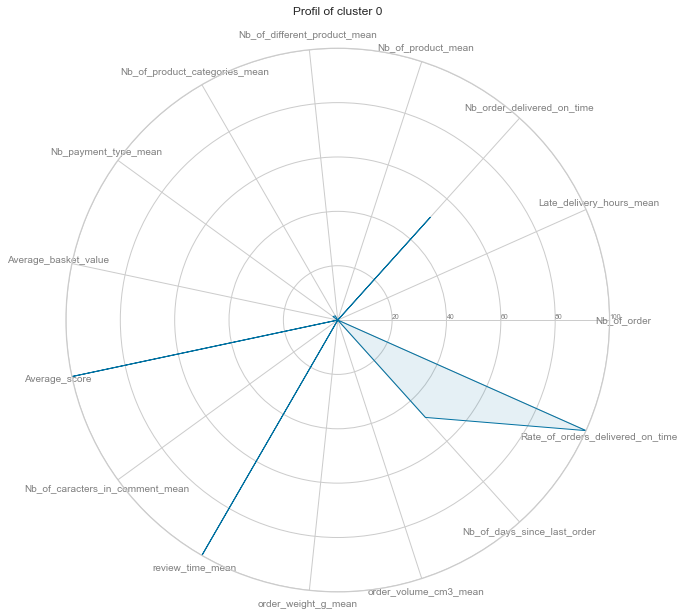

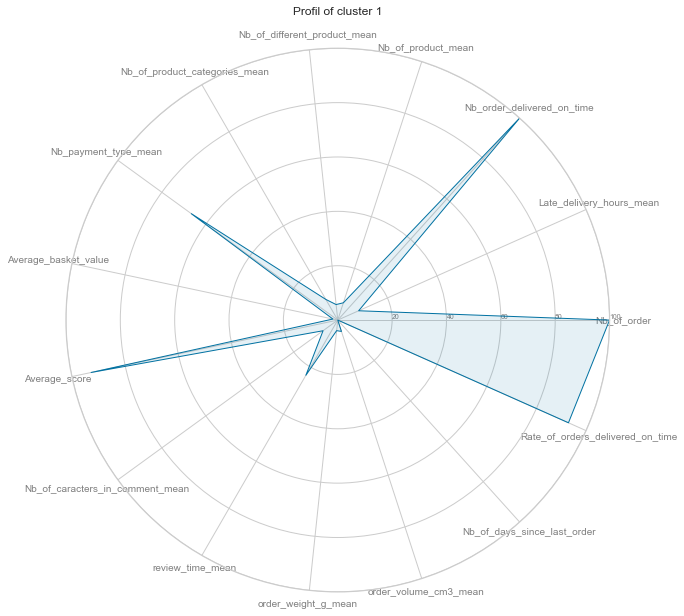

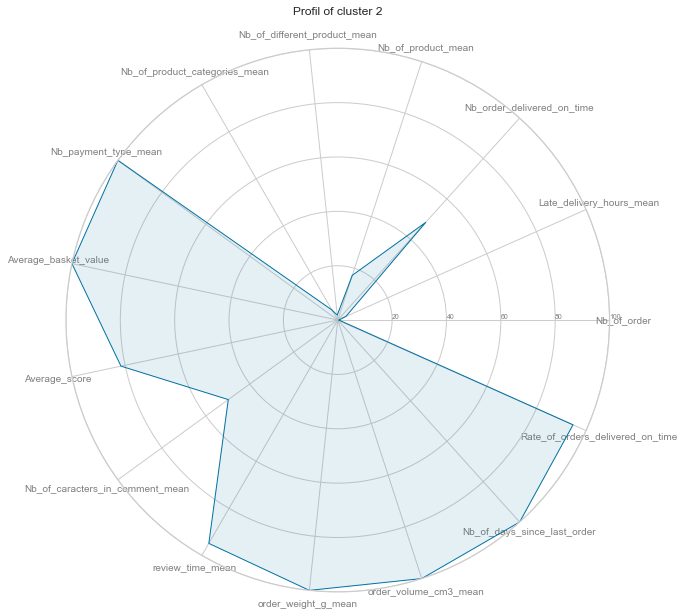

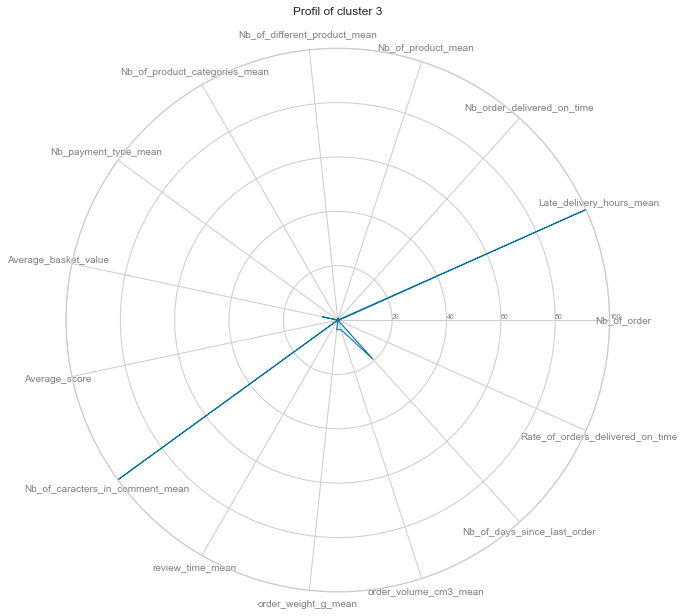

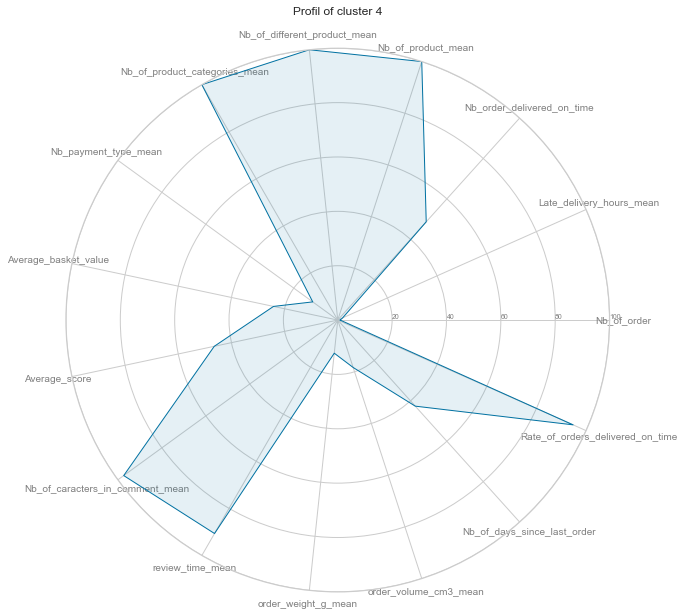

In [51]:
# %%flake8

# use function radar_chart to display a view for each cluster label
print('Radar chart for', data_5_clusters_agg_norm.shape[0], 'clusters')
for i in data_5_clusters_agg_norm.index:
    radar_chart(data_5_clusters_agg_norm, i)

**Cluster 0 : Small customer satisfy who sleep**
- very low basket value
- 1 payment type
- order 1 product
- order delivered on time
- ordered 1 time
- hasn't ordered for some time
- order very small articles
- no review comment
- very good review score

**Cluster 1 : Small regular customer satisfied**
- very low basket value
- use several payment type
- order a few product
- order delivered on time
- order a lot
- ordered recently
- order very small articles
- no review comment
- very good review score

**Cluster 2 : Big customer satisfied, lost**
- very big basket value
- use lot of payment type
- order 1 product
- order delivered on time
- ordered 1 time
- ordered a long time ago
- order big articles
- write some review comment
- good review score

**Cluster 3 : New small customer unsatisfied**
- very low basket value
- 1 payment type
- order 1 product
- not delivered on time
- ordered 1 time
- ordered recently
- order very small articles
- lot of review comment
- very low review score

**Cluster 4 : Small customer moderately satisfied who's going to sleep**
- low basket value
- 1 payment type
- order different products
- order delivered on time
- ordered 1 time
- ordered not too long ago
- order small articles
- lot of review comment
- review score below average

***

**Representation for 6 Clusters**

In [52]:
# %%flake8

# use function group_datas to group clusters label
# and calculate the mean of features

# datas of other clusters to remove
drop_column = len(clusters_test)-1

# group datas for 6 clusters
data_6_clusters_aggregated = group_datas(
    data_clustered, str(clusters_test[2]) + '_clusters').iloc[:, :-drop_column]

data_6_clusters_aggregated

6_clusters  Nb_of_order  Late_delivery_hours_mean  \
0           0        -0.16                     -0.15   
1           1         5.16                     -0.03   
2           2        -0.14                     -0.09   
3           3        -0.13                      1.32   
4           4        -0.11                     -0.12   
5           5        -0.16                     -0.15   

   Nb_order_delivered_on_time  Nb_of_product_mean  \
0                        0.20               -0.15   
1                        2.84                0.07   
2                        0.05                0.46   
3                       -2.54               -0.12   
4                        0.08                3.10   
5                        0.20               -0.14   

   Nb_of_different_product_mean  Nb_of_product_categories_mean  \
0                         -0.17                           0.04   
1                          0.09                           0.04   
2                         -0.08                          -0.00   
3                         -0.15                          -0.06   
4                          4.26                           1.08   
5                         -0.16                          -0.15   

   Nb_payment_type_mean  Average_basket_value  Average_score  \
0                 -0.04                 -0.13           0.29   
1                  0.04                 -0.10           0.08   
2                  0.08                  2.10          -0.09   
3                 -0.01                 -0.01          -1.29   
4                  0.00                  0.39          -0.60   
5                  0.05                 -0.12           0.03   

   Nb_of_caracters_in_comment_mean  review_time_mean  order_weight_g_mean  \
0                            -0.20             -0.05                -0.19   
1                            -0.05             -0.02                -0.06   
2                             0.19              0.00                 3.19   
3                             0.46             -0.03                -0.07   
4                             0.44             -0.00                 0.21   
5                             0.08              0.08                -0.15   

   order_volume_cm3_mean  Nb_of_days_since_last_order  \
0                  -0.20                        -0.68   
1                  -0.04                        -0.11   
2                   2.98                         0.11   
3                  -0.07                        -0.07   
4                   0.38                        -0.02   
5                  -0.13                         1.00   

   Rate_of_orders_delivered_on_time  
0                              0.34  
1                              0.11  
2                              0.15  
3                             -2.97  
4                              0.17  
5                              0.34

In [53]:
# %%flake8

# use function normalize_df to normalize with
# MinMaxScaler to have same scale (0,100) for each features
data_6_clusters_agg_norm = normalize_df(data_6_clusters_aggregated.iloc[:, 1:])

# reassign the name of columns
data_6_clusters_agg_norm.columns = data_6_clusters_aggregated.iloc[
    :, 1:].columns
data_6_clusters_agg_norm

Nb_of_order  Late_delivery_hours_mean  Nb_order_delivered_on_time  \
0         0.00                      0.00                       50.86   
1       100.00                      8.42                      100.00   
2         0.46                      3.81                       48.12   
3         0.61                    100.00                        0.00   
4         0.89                      1.98                       48.62   
5         0.00                      0.00                       50.86   

   Nb_of_product_mean  Nb_of_different_product_mean  \
0                0.00                          0.00   
1                6.84                          5.70   
2               18.72                          1.99   
3                1.02                          0.34   
4              100.00                        100.00   
5                0.53                          0.01   

   Nb_of_product_categories_mean  Nb_payment_type_mean  Average_basket_value  \
0                          15.37                  0.00                  0.00   
1                          15.53                 71.74                  1.61   
2                          12.09                100.00                100.00   
3                           7.49                 29.05                  5.43   
4                         100.00                 37.19                 23.47   
5                           0.00                 74.46                  0.52   

   Average_score  Nb_of_caracters_in_comment_mean  review_time_mean  \
0         100.00                             0.00              0.00   
1          86.58                            22.38             20.55   
2          75.63                            58.03             41.31   
3           0.00                           100.00             14.37   
4          44.02                            97.12             35.55   
5          83.36                            41.96            100.00   

   order_weight_g_mean  order_volume_cm3_mean  Nb_of_days_since_last_order  \
0                 0.00                   0.00                         0.00   
1                 3.87                   4.84                        33.62   
2               100.00                 100.00                        46.92   
3                 3.59                   4.13                        36.43   
4                11.81                  18.09                        39.33   
5                 0.98                   2.23                       100.00   

   Rate_of_orders_delivered_on_time  
0                            100.00  
1                             92.91  
2                             94.21  
3                              0.00  
4                             94.74  
5                            100.00

Radar chart for 6 clusters


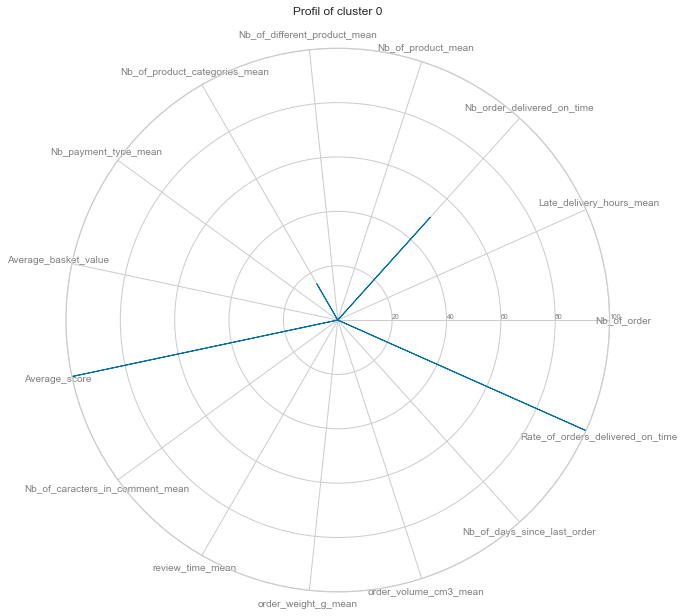

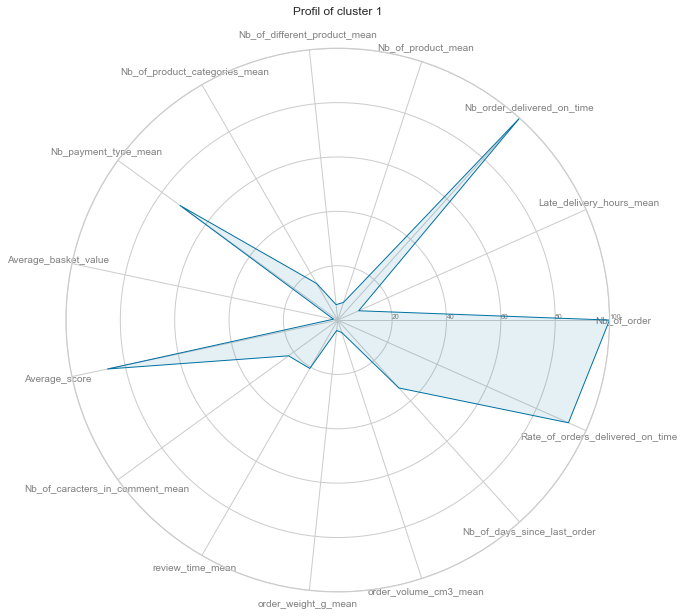

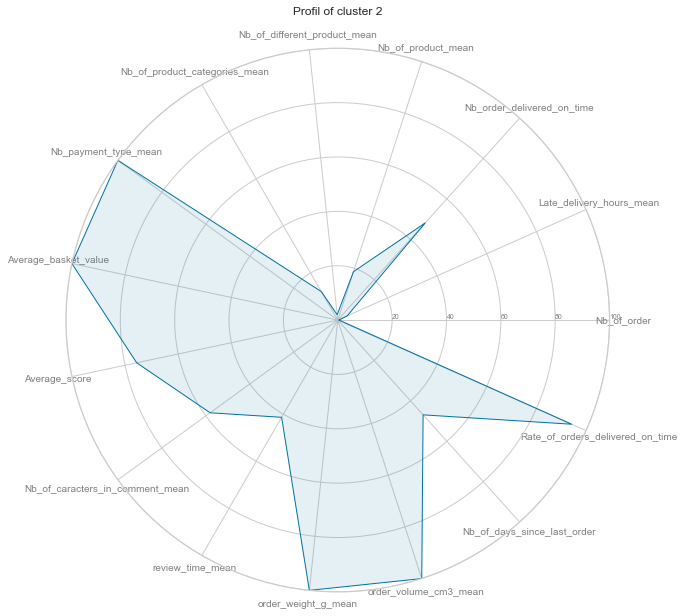

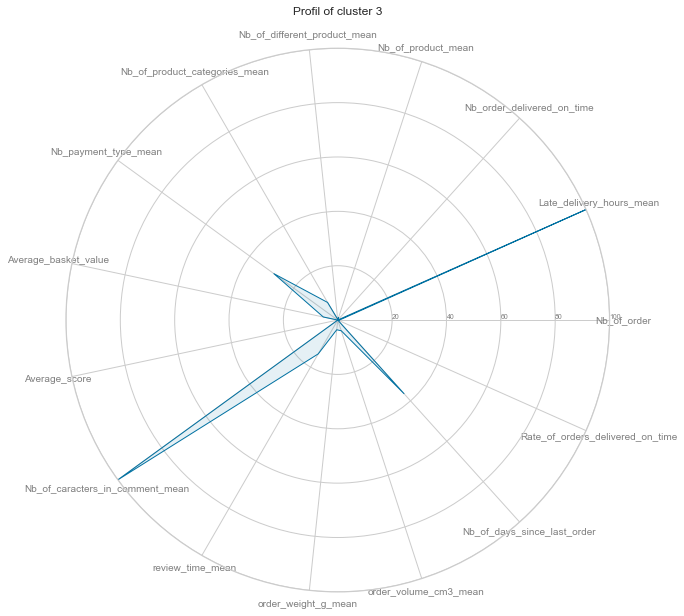

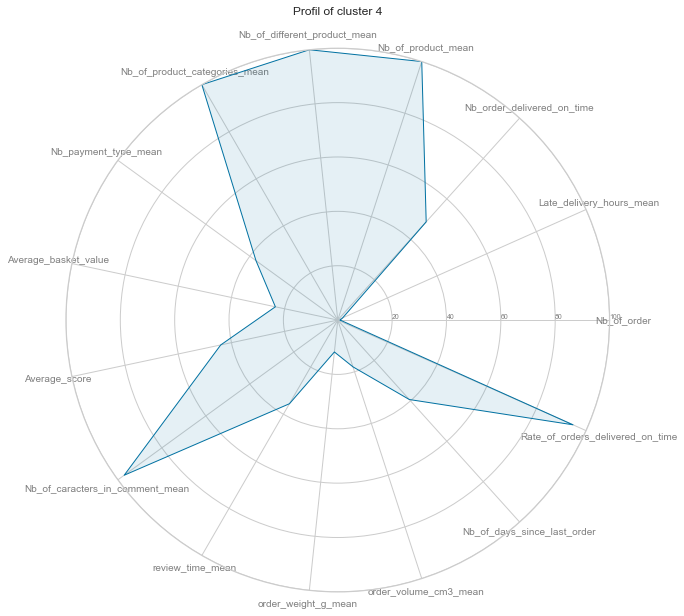

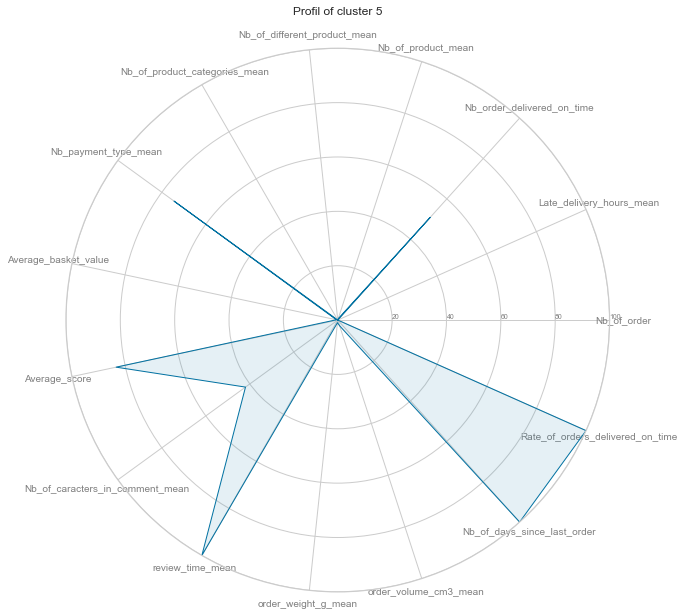

In [54]:
# %%flake8

# use function radar_chart to display a view for each cluster label
print('Radar chart for', data_6_clusters_agg_norm.shape[0], 'clusters')
for i in data_6_clusters_agg_norm.index:
    radar_chart(data_6_clusters_agg_norm, i)

**Cluster 0 : New small customer satisfied**
- very low basket value
- 1 payment type
- order 1 product
- order delivered on time
- ordered 1 time
- ordered recently
- order small articles
- no review comment
- very good review score

**Cluster 1 : Small regular customer satisfied who's going to sleep**
- very low basket value
- use several payment type
- order a few product
- order delivered on time
- order a lot
- ordered not too long ago
- order very small articles
- write some review comment
- very good review score

**Cluster 2 : Big customer satisfied who sleep**
- very big basket value
- use lot of payment type
- order a few product
- order delivered on time
- ordered 1 time
- hasn't ordered for some time
- order big articles
- write some review comment
- good review score

**cluster 3 : Small customer unsatisfied**
- very low basket value
- use several payment type
- order 1 product
- not delivered on time
- ordered 1 time
- ordered not too long ago
- order very small articles
- lot of review comment
- very low review score

**Cluster 4 : Small customer moderately satisfied who's going to sleep**
- low basket value
- use several payment type
- order different products
- order delivered on time
- ordered 1 time
- ordered not too long ago
- order small articles
- lot of review comment
- review score below average

**Cluster 5 : Small customer satisfied, lost**
- very low basket value
- use several payment type
- order 1 product
- order delivered on time
- ordered 1 time
- ordered a long time ago
- order very small articles
- write some review comment
- good review score

***

**Representation for 7 Clusters**

In [55]:
# %%flake8

# use function group_datas to group clusters label
# and calculate the mean of features

# datas of other clusters to remove
drop_column = len(clusters_test)-1

# group datas for 7 clusters
data_7_clusters_aggregated = group_datas(
    data_clustered, str(clusters_test[3]) + '_clusters').iloc[:, :-drop_column]

data_7_clusters_aggregated

7_clusters  Nb_of_order  Late_delivery_hours_mean  \
0           0        -0.14                     -0.12   
1           1        -0.11                      7.66   
2           2        -0.16                     -0.15   
3           3        -0.04                     -0.06   
4           4         5.16                     -0.04   
5           5        -0.13                      0.27   
6           6        -0.11                     -0.14   

   Nb_order_delivered_on_time  Nb_of_product_mean  \
0                        0.07                0.41   
1                       -2.52               -0.03   
2                        0.20               -0.15   
3                       -0.03               -0.06   
4                        2.85                0.07   
5                       -2.54               -0.12   
6                        0.10                3.11   

   Nb_of_different_product_mean  Nb_of_product_categories_mean  \
0                         -0.09                          -0.01   
1                         -0.07                          -0.19   
2                         -0.17                          -0.04   
3                         -0.03                           0.07   
4                          0.09                           0.04   
5                         -0.15                          -0.04   
6                          4.24                           1.07   

   Nb_payment_type_mean  Average_basket_value  Average_score  \
0                  0.07                  2.04          -0.08   
1                  0.07                  0.12          -1.74   
2                 -0.01                 -0.14           0.19   
3                  0.06                 -0.07           0.16   
4                  0.04                 -0.09           0.08   
5                 -0.02                 -0.03          -1.22   
6                  0.00                  0.40          -0.59   

   Nb_of_caracters_in_comment_mean  review_time_mean  order_weight_g_mean  \
0                             0.18             -0.03                 3.00   
1                             0.82             -0.04                 0.02   
2                            -0.08             -0.03                -0.18   
3                            -0.11             17.15                 0.01   
4                            -0.05             -0.04                -0.05   
5                             0.40             -0.07                -0.07   
6                             0.45             -0.03                 0.22   

   order_volume_cm3_mean  Nb_of_days_since_last_order  \
0                   2.79                         0.13   
1                   0.09                         0.94   
2                  -0.18                         0.00   
3                   0.00                         0.79   
4                  -0.04                        -0.12   
5                  -0.08                        -0.23   
6                   0.38                        -0.01   

   Rate_of_orders_delivered_on_time  
0                              0.18  
1                             -2.96  
2                              0.34  
3                             -0.01  
4                              0.11  
5                             -2.97  
6                              0.19

In [56]:
# %%flake8

# use function normalize_df to normalize with
# MinMaxScaler to have same scale (0,100) for each features
data_7_clusters_agg_norm = normalize_df(data_7_clusters_aggregated.iloc[:, 1:])

# reassign the name of columns
data_7_clusters_agg_norm.columns = data_7_clusters_aggregated.iloc[
    :, 1:].columns
data_7_clusters_agg_norm

Nb_of_order  Late_delivery_hours_mean  Nb_order_delivered_on_time  \
0         0.42                      0.39                       48.46   
1         0.95                    100.00                        0.27   
2         0.00                      0.00                       50.78   
3         2.24                      1.15                       46.46   
4       100.00                      1.41                      100.00   
5         0.63                      5.32                        0.00   
6         0.89                      0.18                       48.93   

   Nb_of_product_mean  Nb_of_different_product_mean  \
0               17.08                          1.78   
1                3.79                          2.13   
2                0.00                          0.00   
3                2.74                          3.17   
4                6.63                          5.73   
5                0.74                          0.36   
6              100.00                        100.00   

   Nb_of_product_categories_mean  Nb_payment_type_mean  Average_basket_value  \
0                          13.87                 99.40                100.00   
1                           0.00                100.00                 11.82   
2                          11.56                 17.28                  0.00   
3                          20.03                 86.86                  3.10   
4                          17.82                 72.57                  1.94   
5                          11.83                  0.00                  5.05   
6                         100.00                 27.84                 24.48   

   Average_score  Nb_of_caracters_in_comment_mean  review_time_mean  \
0          86.43                            31.46              0.25   
1           0.00                           100.00              0.15   
2         100.00                             3.19              0.20   
3          98.52                             0.00            100.00   
4          94.66                             7.05              0.14   
5          27.05                            54.97              0.00   
6          59.64                            60.77              0.20   

   order_weight_g_mean  order_volume_cm3_mean  Nb_of_days_since_last_order  \
0               100.00                 100.00                        30.62   
1                 6.48                   9.16                       100.00   
2                 0.00                   0.00                        20.09   
3                 6.13                   5.99                        87.22   
4                 4.02                   4.51                         9.69   
5                 3.45                   3.14                         0.00   
6                12.52                  18.82                        18.99   

   Rate_of_orders_delivered_on_time  
0                             95.09  
1                              0.27  
2                            100.00  
3                             89.50  
4                             93.04  
5                              0.00  
6                             95.50

Radar chart for 7 clusters


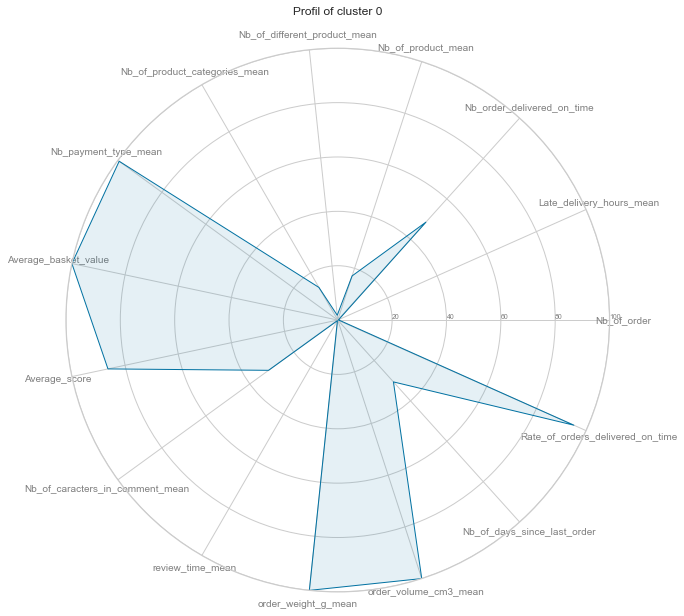

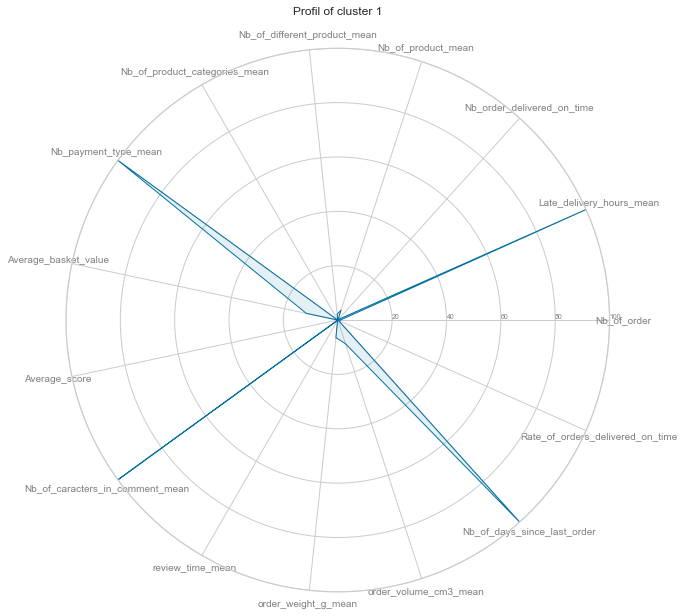

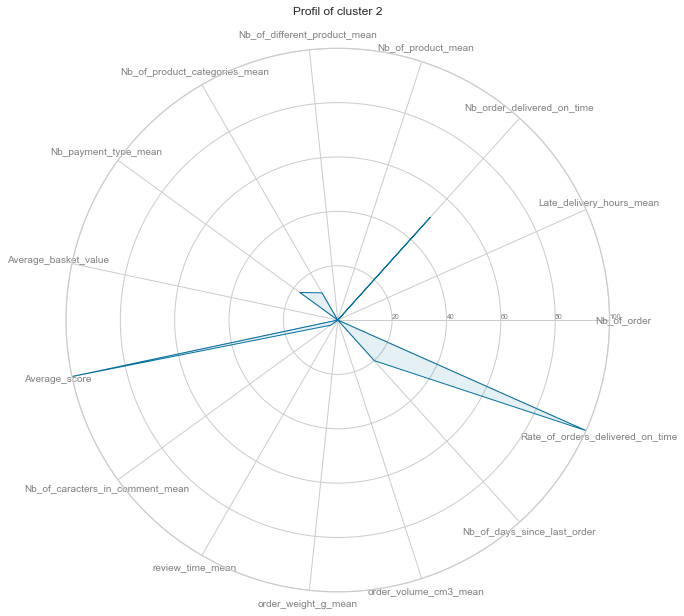

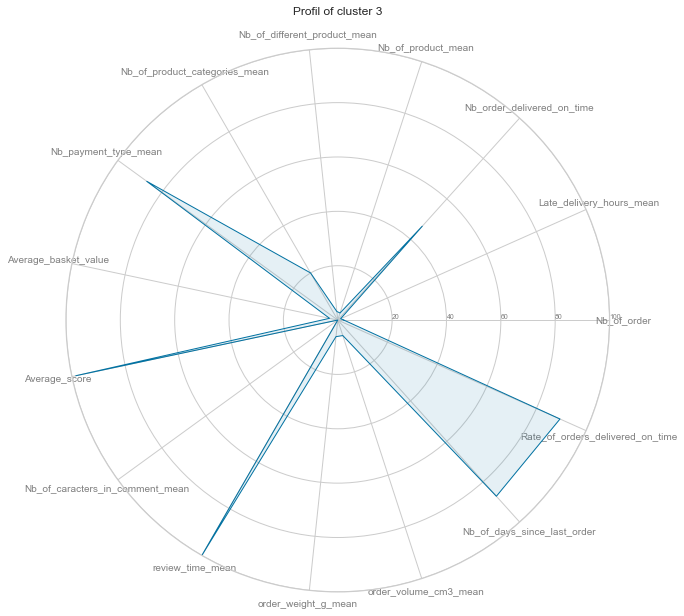

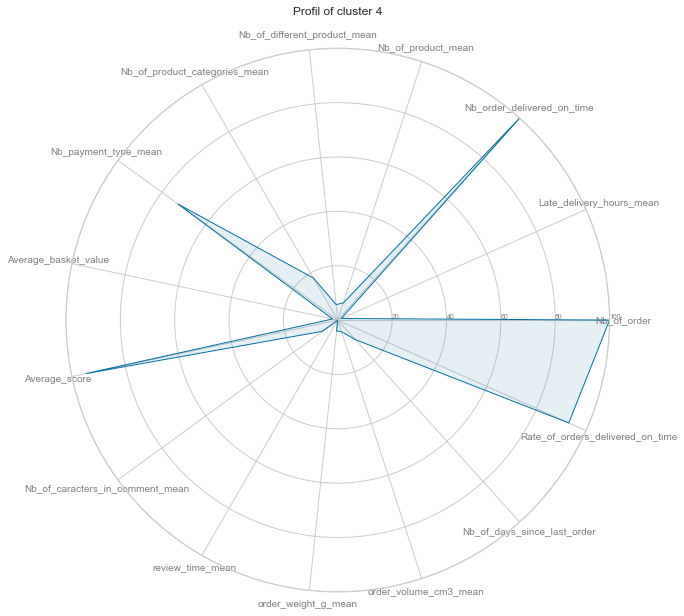

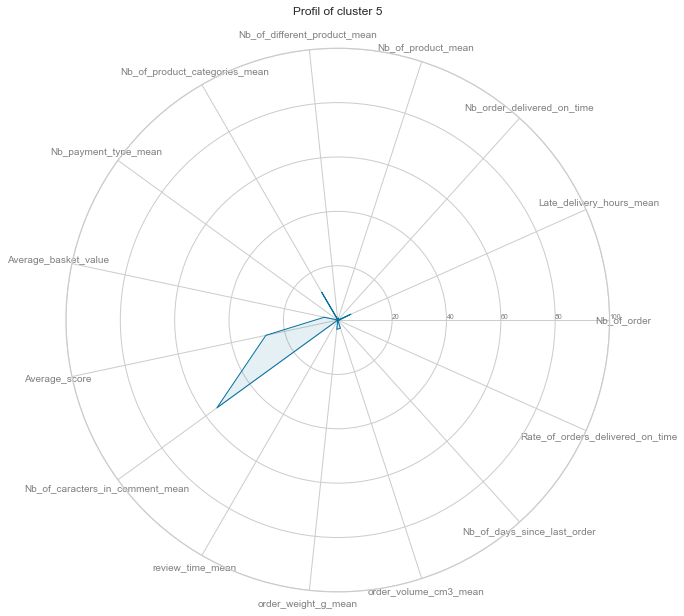

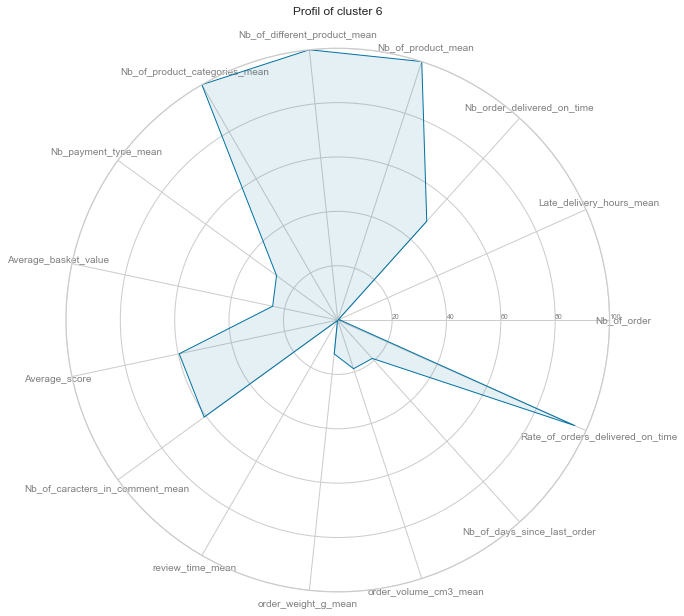

In [57]:
# %%flake8

# use function radar_chart to display a view for each cluster label
print('Radar chart for', data_7_clusters_agg_norm.shape[0], 'clusters')
for i in data_7_clusters_agg_norm.index:
    radar_chart(data_7_clusters_agg_norm, i)

**Cluster 0 : Big customer satisfied who's going to sleep**
- very big basket value
- use lot of payment type
- order 1 product
- order delivered on time
- ordered 1 time
- ordered not too long ago
- order big articles
- write some review comment
- good review score

**cluster 1 : Small customer unsatisfied, lost**
- low basket value
- use lot of payment type
- order 1 product
- not delivered on time
- ordered 1 time
- ordered a long time ago
- order small articles
- lot of review comment
- very low review score

**Cluster 2 : New small customer satisfied**
- very low basket value
- use a few payment type
- order 1 product
- order delivered on time
- ordered 1 time
- ordered recently
- order very small articles
- no review comment
- very good review score

**Cluster 3 : Small customer satisfied, lost**
- very low basket value
- use lot of payment type
- order 1 product
- order delivered on time
- ordered 1 time
- ordered a long time ago
- order small articles
- no review comment
- very good review score

**Cluster 4 : Small regular customer satisfied**
- very low basket value
- use several payment type
- order a few product
- order delivered on time
- order a lot
- ordered recently
- order small articles
- no review comment
- very good review score

**Cluster 5 : New small customer**
- very low basket value
- 1 payment type
- order 1 product
- not yet delivered
- ordered 1 time
- ordered recently
- order small articles
- lot of review comment
- low review score (could be explained because he's not yet delivered)

**Cluster 6 : New small Customer moderately satisfied**
- low basket value
- use a few payment type
- order different products
- order delivered on time
- ordered 1 time
- ordered recently
- order small articles
- write some review comment
- review score above average

Results with 7 clusters give more more user profiles that can be acted on by marketing. So I'll select 7 clusters for the rest of the project

In [58]:
nb_clusters_selected = 7

# Clusters representation

## t-SNE

Use t-SNE to represente labels of clusters on 2 dimensions

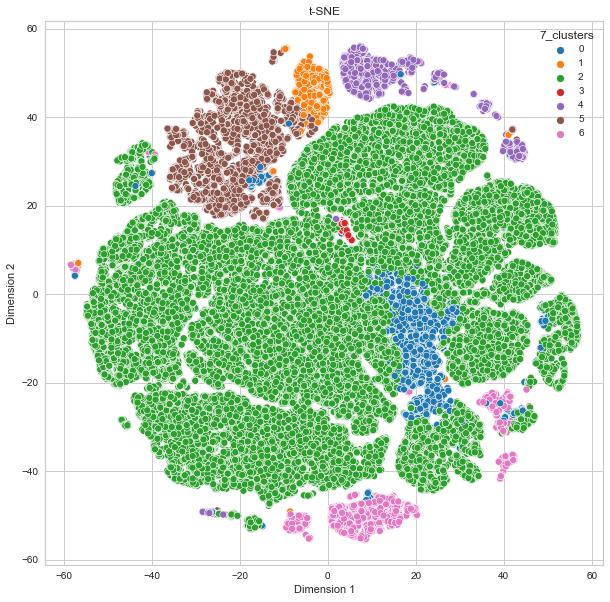

In [59]:
# %%flake8

tsne = TSNE(n_components=2).fit_transform(df_normalized)

plt.figure(figsize=(10, 10))
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1],
                hue=data_clustered[str(nb_clusters_selected) + '_clusters'], palette="tab10")

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE')

# to save graph
plt.savefig('t-SNE.png')

plt.show()

## PCA

Use PCA to represente labels of clusters on 2 dimensions

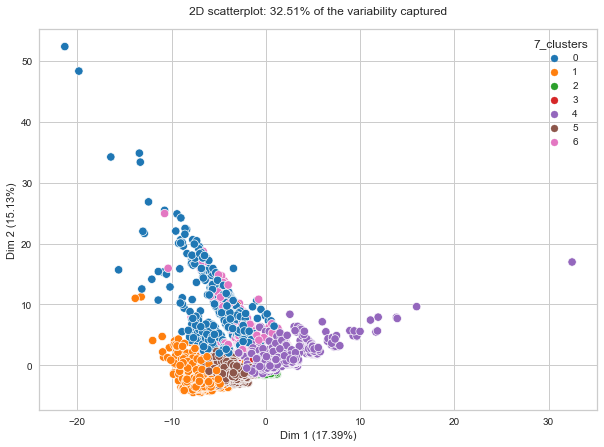

In [60]:
# %%flake8

# display PCA with clusters
display_factorial_planes(1, 2, data_clustered[str(nb_clusters_selected) + '_clusters'])

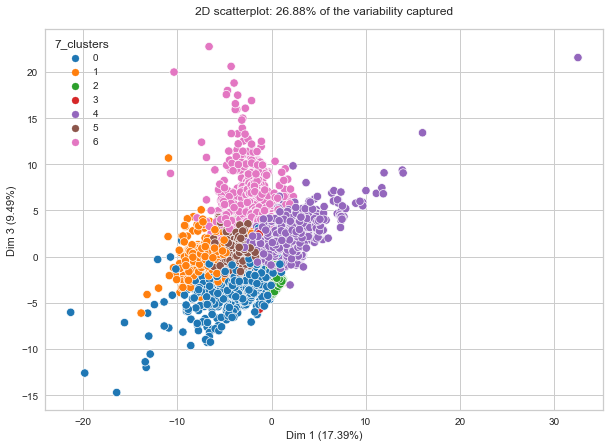

In [61]:
# display PCA with clusters
display_factorial_planes(1, 3, data_clustered[str(nb_clusters_selected) + '_clusters'])

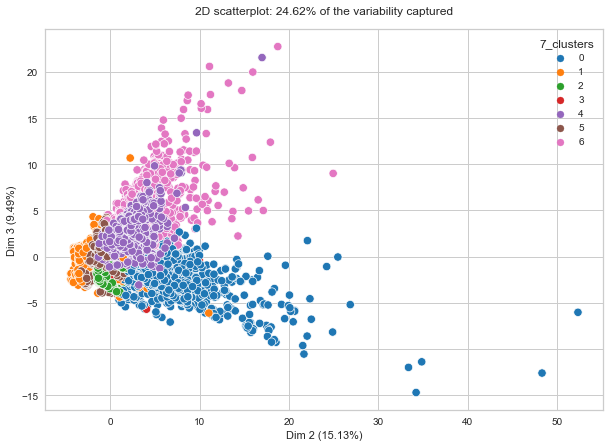

In [62]:
# display PCA with clusters
display_factorial_planes(2, 3, data_clustered[str(nb_clusters_selected) + '_clusters'])

# Stability during initialisation

In [63]:
#%%flake8

# create a sample of customers otherwise
# adjusted_rand_score gives a wrong result
mask_sel = np.random.choice(data_clustering.shape[0],
                            size=60000, replace=False)
data_clustering_sample = data_clustering[mask_sel]

In [64]:
# %%flake8

# store labels for multiple iteration
nb_iter = 10
initialisation_labels = []
for i in range(nb_iter):
    kmeans_model = KMeans(
            n_clusters=nb_clusters_selected).fit(data_clustering_sample)
    initialisation_labels.append(kmeans_model.labels_)

In [65]:
# %%flake8

# calculate ARI score between the different iterations
ari_ini_results = []
for i in range(len(initialisation_labels)):
    for j in range(i+1, len(initialisation_labels)):
        ari_ini_results.append(adjusted_rand_score(initialisation_labels[i],
                                                   initialisation_labels[j]))

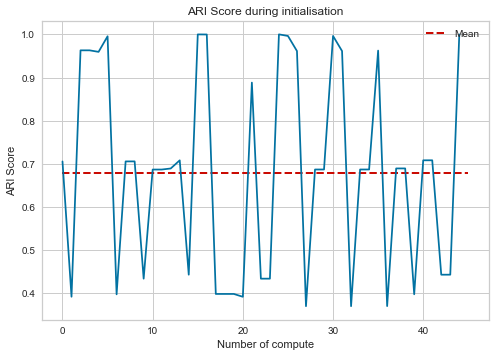

Mean of the ARI score 0.68


In [66]:
# %%flake8

# Graph of the ARI Score during initialisation
plt.plot(ari_ini_results)
plt.hlines(y=mean(ari_ini_results), xmin=0,
           xmax=len(ari_ini_results), colors='r',
           linestyles='--', lw=2, label='Mean')
plt.xlabel('Number of compute')
plt.ylabel('ARI Score')
plt.title('ARI Score during initialisation')
plt.legend(loc='upper right')

# to save graph
plt.savefig('ARI Score during initialisation.png')

plt.show()

print('Mean of the ARI score {:.2f}' .format(mean(ari_ini_results)))

ARI score is not very stable during initialisation

# Stability over the time

In [67]:
# %%flake8

# load datas before all features calculations
# to have the order_purchase_timestamp
data_merged = pd.read_csv('data_merged.csv')

In [68]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96918 entries, 0 to 96917
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    96918 non-null  object 
 1   customer_unique_id             96918 non-null  object 
 2   customer_zip_code_prefix       96918 non-null  int64  
 3   customer_city                  96918 non-null  object 
 4   customer_state                 96918 non-null  object 
 5   order_id                       96918 non-null  object 
 6   order_status                   96918 non-null  object 
 7   order_purchase_timestamp       96918 non-null  object 
 8   order_approved_at              96904 non-null  object 
 9   order_delivered_carrier_date   95912 non-null  object 
 10  order_delivered_customer_date  94742 non-null  object 
 11  order_estimated_delivery_date  96918 non-null  object 
 12  Late_delivery_(hours)          96918 non-null 

In [69]:
# %%flake8

# fix type date
data_merged['order_purchase_timestamp'] = pd.to_datetime(
    data_merged['order_purchase_timestamp'])

In [70]:
data_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96918 entries, 0 to 96917
Data columns (total 30 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    96918 non-null  object        
 1   customer_unique_id             96918 non-null  object        
 2   customer_zip_code_prefix       96918 non-null  int64         
 3   customer_city                  96918 non-null  object        
 4   customer_state                 96918 non-null  object        
 5   order_id                       96918 non-null  object        
 6   order_status                   96918 non-null  object        
 7   order_purchase_timestamp       96918 non-null  datetime64[ns]
 8   order_approved_at              96904 non-null  object        
 9   order_delivered_carrier_date   95912 non-null  object        
 10  order_delivered_customer_date  94742 non-null  object        
 11  order_estimated

In [71]:
# %%flake8

# calculate fisrt and last purchase date
max_date = data_merged['order_purchase_timestamp'].max()
min_date = data_merged['order_purchase_timestamp'].min()
print('Fisrt order purchase date : ', min_date.strftime("%m/%d/%Y"))
print('Last order purchase date : ', max_date.strftime("%m/%d/%Y"))

Fisrt order purchase date :  09/04/2016
Last order purchase date :  09/03/2018


In [72]:
# %%flake8

# calculate the date for 1 year of datas
first_year = (min_date + relativedelta(years=1))
first_year

Timestamp('2017-09-04 21:15:19')

In [73]:
# %%flake8

""" Create a function to calculate the same features than
the features created for the clustering"""


def features_calculation(df, date):

    # filter the datas to consider just a period
    df = df[(df['order_purchase_timestamp'] < date)]

    # Group datas on customer_unique_id and calculate the differents features
    df_grouped = df.groupby('customer_unique_id', as_index=False)\
        .agg(Nb_of_order=('order_id', 'count'),
             First_order=('order_purchase_timestamp', 'min'),
             Last_order=('order_purchase_timestamp', 'max'),
             Late_delivery_hours_mean=('Late_delivery_(hours)', 'mean'),
             Nb_order_delivered_on_time=('order_delivery_on_time', 'sum'),
             Nb_of_product_mean=('Nb_of_product', 'mean'),
             Nb_of_different_product_mean=('Nb_of_different_product', 'mean'),
             Nb_of_product_categories_mean=('Nb_of_product_categories',
                                            'mean'),
             Nb_of_payment_sequential_mean=('payment_sequential', 'mean'),
             Nb_payment_type_mean=('payment_type', 'mean'),
             Average_basket_value=('amount_of_order', 'mean'),
             Nb_of_comment=('review_score', 'count'),
             Average_score=('review_score', 'mean'),
             Nb_of_caracters_in_comment_mean=(
                 'Nb_of_caracters_in_comment', 'mean'),
             review_time_mean=('review_time', 'mean'),
             order_weight_g_mean=('order_weight_g', 'mean'),
             order_volume_cm3_mean=('order_volume_cm3', 'mean')
             )\
        .sort_values('Nb_of_order')

    # add column with number of day since the last order
    # (compare to the max date in the dataframe)
    df_grouped['Nb_of_days_since_last_order'] = (
        date-df_grouped['Last_order']).dt.days

    # add a column with the rate of order delivered on time
    df_grouped['Rate_of_orders_delivered_on_time'] = 100 * \
        df_grouped['Nb_order_delivered_on_time']/(df_grouped['Nb_of_order'])

    # remove useless columns
    df_grouped.drop(['First_order', 'Last_order',
                     'Nb_of_payment_sequential_mean', 'Nb_of_comment'],
                    axis=1, inplace=True)

    # df_grouped=df_grouped[df_grouped['customer_unique_id'].isin(cust_list)]
    df_grouped.set_index('customer_unique_id', inplace=True)

    return df_grouped

In [74]:
# %%flake8

""" Calculate the ARI store over the time """

ari_stab_results = []

# last date of the period (minus 1 month to covert all date in the while loop)
max_period = first_year - relativedelta(months=1)
print('Initial period of the study, from',
      min_date.date(), 'to', (max_period + relativedelta(months=1)).date())
init = 1

# loop to calculate ARI score for the initial period and each month after
while max_period < max_date:
    max_period += relativedelta(months=1)

    # use function features_calculation to calculate
    # the same features than the features created for the clustering
    data_period = features_calculation(data_merged, max_period)

    # create a filter of customers in the inital period
    if init == 1:
        print('Number of customers :', len(data_period))
        data_filtered = data_merged[
            data_merged['order_purchase_timestamp'] < max_period]

        customer_list = data_filtered['customer_unique_id'].unique()
        init = 0

    # calculate clusters label on the period,
    # I consider just the intial customers
    data_initial_cust = data_period[data_period.index.isin(customer_list)]
    X_scaled_initial_cust, pca_initial_cust,\
        X_pca_initial_cust = calculate_pca(data_initial_cust)
    data_initial_clust = X_pca_initial_cust[:, :nb_component]
    kmeans_model_time = KMeans(n_clusters=nb_clusters_selected,
                               random_state=rd_state)
    kmeans_model_time.fit(data_initial_clust)
    labels_initial_clust = kmeans_model_time.labels_

    # calculate clusters label on the period,
    # I consider all the customer of the period
    X_scaled_all_cust, pca_all_cust,\
        X_pca_all_cust = calculate_pca(data_period)
    data_all_clust = X_pca_all_cust[:, :nb_component]
    labels_all_clust = kmeans_model_time.predict(data_all_clust)
    # filter the clusters label of customers of the initial customers
    df_labels_all_cust = pd.DataFrame(labels_all_clust,
                                      index=data_period.index)
    df_labels_all_cust_filtered = df_labels_all_cust[
        df_labels_all_cust.index.isin(customer_list)]

    # calculate and save the ARI score
    ari_stab_results.append(adjusted_rand_score(
        labels_initial_clust, df_labels_all_cust_filtered[0]))

Initial period of the study, from 2016-09-04 to 2017-09-04
Number of customers : 22671


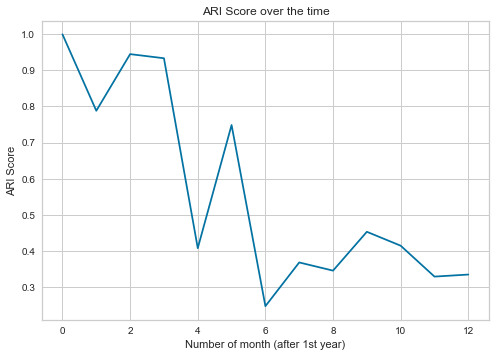

In [75]:
# %%flake8

# Graph of the ARI Score over the time
plt.plot(ari_stab_results)
plt.xlabel('Number of month (after 1st year)')
plt.ylabel('ARI Score')
plt.title('ARI Score over the time')

# to save graph
plt.savefig('ARI Score over the time.png')

plt.show()

We can see that the ARI score drops after 4 months